In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pandas
sys.path.append("..")
#import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import random
warnings.filterwarnings('ignore')
import os
from scipy.integrate import odeint
from scipy.optimize import curve_fit

datadir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Mechanics/Data/'
#datadir2  = '/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/model_strict_tetramer/EquilibriumSeededWorkflow/Data/'
plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Mechanics/Plots/'

import sys

# Check the current recursion limit
current_limit = sys.getrecursionlimit()
print("Current recursion limit:", current_limit)

# Increase the recursion limit
sys.setrecursionlimit(6000)

Current recursion limit: 3000


In [2]:
def intersection(y,y0):
    diff = []
    for i in range(len(y)):
        diff.append(float((y[i]-y0)*(y[i]-y0)))
    diff2 = sorted(diff)
    x = diff.index(diff2[0])
    return x , diff[x]

In [3]:
# function that returns dy/dt
def shorttimesSLS(y,t):
    P1 = (eta*(E1+E2)/(E2))
    
    epsilon = r_eps*t
    epsilon_dot = r_eps
    dydt = (E2/eta)*(E1*epsilon+P1*epsilon_dot-y)
    return dydt

def longtimes(y,t):
    P1 = (eta*(E1+E2)/(E2))
    maxstrain = r_eps*tstretch
    epsilon = maxstrain
    epsilon_dot = 0
    dydt = (E2/eta)*(E1*epsilon+P1*epsilon_dot-y)
    return dydt

In [4]:
def model_func(t, a, b, c):
    return a * np.exp(-b * t) + c

In [24]:
clrs00 = ['#A10035','#2A0944','lightsalmon','#3FA796','#FEC260','pink','#A10035','#2A0944','#3FA796']
cmap0 = plt.cm.get_cmap('Spectral_r') #YlOrBr
cmap1 = plt.cm.get_cmap('YlOrBr') #YlOrBr
#cmap2 = plt.cm.get_cmap('twilight') #twilight
cmap2 = plt.cm.get_cmap('GnBu') #twilight
cmap3 = plt.cm.get_cmap('BuPu') #twilight
clrs = ['#a6611a','#dfc27d','#80cdc1','#018571','#0c2c84','black']
clrs2 = ['#ffffcc','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84']
clrs3 = ['#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#0c2c84']


15500
Fitted parameters:
a = 0.08541497947411318
b = 0.00011089297343777857
c = 0.008519940758869218
0
23188
Fitted parameters:
a = 0.12974784348120033
b = 2.60311901240107e-05
c = 0.012733682138286314
0
21204
Fitted parameters:
a = 0.12493676842109003
b = 1.861158828477911e-05
c = 0.04006452043985183
0
17484
Fitted parameters:
a = 0.12887424100113312
b = 3.044968924548988e-05
c = 0.08082114650998791
0
17360
Fitted parameters:
a = 0.11737736658466406
b = 2.4600278311587472e-05
c = 0.08082689405359936
0
12896
Fitted parameters:
a = 0.19486719355339477
b = 7.908462552541047e-05
c = 0.009587894899328559
0
25296
Fitted parameters:
a = 0.3381707179978932
b = 2.2855726793592615e-05
c = 0.024457542249009426
0
35092
Fitted parameters:
a = 0.3258933985886218
b = 1.580062533239527e-05
c = 0.14754896194831796
0
23064
Fitted parameters:
a = 0.25481736134078514
b = 2.0575355823852915e-05
c = 0.2489508684895218
0
21080
Fitted parameters:
a = 0.20856754897795549
b = 1.0562884978871387e-05
c = 0.27537

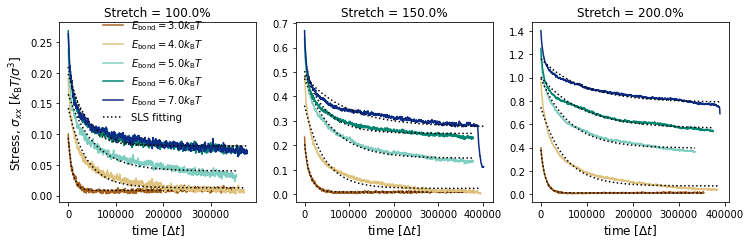

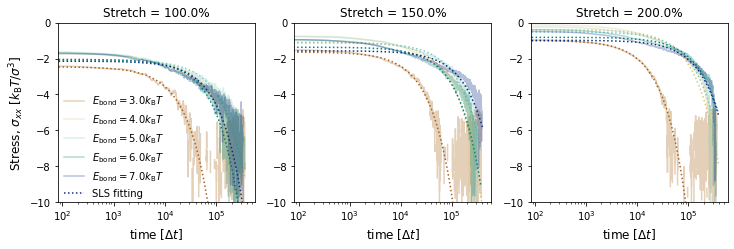

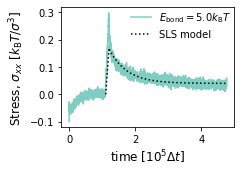

In [29]:
## Fitting not using sigma_inf

fs = 14
fig,ax = plt.subplots(1,3,figsize = (12,3.3))
fig3,ax3 = plt.subplots(1,3,figsize = (12,3.3))
fig2,ax2 = plt.subplots(1,figsize = (3.5,2.5))
frame = 440
ChemEngs = "3.0 4.0 5.0 6.0 7.0".split() #3.0 4.0 5.0 6.0 7.0 100.0
Strain = "72 108 144".split() #72 108 144
StrainV=[72,108,144] #72,108,144
tausstress= []
#str_inf0=1
Infs_ova_inf0_strss =[]
Deltas_ova_inf0_strss = []
E1s = np.zeros((len(Strain),len(ChemEngs)))
etas = np.zeros((len(Strain),len(ChemEngs)))
E2s = np.zeros((len(Strain),len(ChemEngs)))

for ss in range(len(Strain)):
    for e in range(len(ChemEngs)): #len(ChemEngs)
        file = 'stressprofiles/stress_E'+str(ChemEngs[e])+'_Strain'+str(Strain[ss])+'.dat'
       # file = 'stressprofiles/stress_E'+str(ChemEngs[e])+'.dat'
        stress = pandas.read_csv(datadir+file, sep = ' ', header = 'infer')
        Time_ = stress.Time
        Time = Time_.values
        StressXFull_ = stress.Avstress
        StressXStd = stress.stdstress
        StressXFull = StressXFull_.values
        
        ## Factual parameters:
        
        Eps_max = StrainV[ss]/72 #108
        tstretch = 1e4
        r_eps = Eps_max/tstretch
        N=10
        t_postStretch = int((4097-N)*(120/500))
        #push = 0
        
        
        
        TimeNew = Time[t_postStretch+int(N/2):-int(N/2)+1]-Time[t_postStretch+int(N/2)]
        TimePreStretch = Time[int(N/2):-int(N/2)+1+t_postStretch] #-Time[t_postStretch+push+int(N/2)]
        StressXAv = np.convolve(np.abs(np.ravel(StressXFull[t_postStretch:])), np.ones(N)/N, mode='valid')
        StressXAvPreStretch = np.convolve(np.abs(np.ravel(StressXFull[:t_postStretch])), np.ones(N)/N, mode='valid')
        
        
        sigma_max = StressXAv[0]
        if ss==2:
            #else:
            sigma_inf = np.mean(StressXFull[-500:-400])
            StressXAv = np.convolve(np.abs(np.ravel(StressXFull[t_postStretch:-400])), np.ones(N)/N, mode='valid')
            TimeNew = Time[t_postStretch+int(N/2):-int(N/2)+1-400]-Time[t_postStretch+int(N/2)]
        else:
            sigma_inf = np.mean(StressXFull[-300:-200])
        #sigma_inf = np.mean(StressXAv[-300:-200])
        sigma_max = StressXAv[0]
        str0 = sigma_max-sigma_inf
        strTau = str0/np.exp(1) + sigma_inf
        tau = intersection(StressXAv ,strTau)[0]
        DeltaStrain = sigma_max-sigma_inf
        print(TimeNew[tau])
        
        # Initial guess for the parameters [a, b, c]
        initial_guess = [DeltaStrain, 1/TimeNew[tau], sigma_inf]

        # Fit the curve
        params, covariance = curve_fit(model_func, TimeNew, StressXAv, p0=initial_guess)

        # Extracting the parameters a, b, c
        a, b, c = params

        # Print the fitted parameters
        print(f"Fitted parameters:\na = {a}\nb = {b}\nc = {c}")
        
        sigma_inf = c
        newTau = 1/b
        DeltaStrain=a
        
        #sigma_inf = np.mean(StressXFull[-100:])
        #sigma_inf = np.mean(StressXAv[-300:-200])
        #sigma_max = StressXAv[0]
        #str0 = sigma_max-sigma_inf
        #strTau = str0/np.exp(1) + sigma_inf
        #tau = intersection(StressXAv ,strTau)[0]
        #print(np.shape(TimeNew[0])) #,TimeNew[tau])
        #print(tau,Time[tau],Time[t_postStretch+tau]-Time[t_postStretch])

        #print(sigma_max)
        #DeltaStrain = sigma_max-sigma_inf
        eta = DeltaStrain/(r_eps*(1-np.exp(-tstretch/newTau)))
        #print(E1)
        E2 = eta/newTau
        yL_exact = []
        yS_exact = []
        E1 = sigma_inf/Eps_max
        if eta > 10**6:
            E1s[ss][e] = None
            E2s[ss][e]=None
            etas[ss][e]=None
        else:
            E1s[ss][e]=E1
            E2s[ss][e]=E2
            etas[ss][e]=eta

        print(Time[0])
        for tt in range(len(TimeNew)):
            t=TimeNew[tt]
            yL_exact.append(r_eps*eta*(1-np.exp(-tstretch*E2/eta))*np.exp(-t*E2/eta)+E1*tstretch*r_eps)
        #TimePreStretch = Time[:t_postStretch]
        t1 = np.linspace(0,tstretch)
        for tt in range(len(t1)):
            t = t1[tt] #TimePreStretch[tt]
            yS_exact.append(r_eps*(E1*t+eta) - eta*r_eps*np.exp(-t*E2/eta))
        #print('eta,E1,E2,sigma_inf',eta,E1,E2,sigma_inf)
        #ax.plot(Time[t_postStretch+push:],StressXFull[t_postStretch+push:],alpha = 0.5,color = clrs[e])
        if e==2 and ss==0:
            ax2.plot(np.divide(Time,10**5),StressXFull,alpha = 1,color = clrs[e],label = r'$E_{\mathrm{bond}} = $'+ChemEngs[e]+r'$k_{\mathrm{B}}T$')
            #ax2.plot(np.add(TimeNew,Time[t_postStretch+push+int(N/2)]),StressXAv,alpha = 1,color = clrs[e],label = r'$E_{\mathrm{bond}} = $'+ChemEngs[e]+r'$k_{\mathrm{B}}T$')
            ax2.plot(np.divide(np.add(TimeNew,Time[t_postStretch+int(N/2)]),10**5),yL_exact,linestyle = ':',color = 'black')
            ax2.plot(np.divide(np.add(t1,Time[t_postStretch]-t1[-1]),10**5),yS_exact,linestyle = ':',color = 'black',label = 'SLS model')
            #ax2.plot(TimePreStretch,StressXAvPreStretch,alpha = 1,color = clrs[e],label = r'$E_{\mathrm{bond}} = $'+ChemEngs[e]+r'$k_{\mathrm{B}}T$')
            text = r'$E_{1} = $'+str(np.round(E1,2))+r'$~k_{\mathrm{B}}T/\sigma^{3}$'+'\n$E_{2} = $'+str(np.round(E2,2))+r'$~k_{\mathrm{B}}T/\sigma^{3}$'+'\n'+'$\eta = $'+str(int(eta))+r'$~k_{\mathrm{B}}T\Delta t/\sigma^{3}$'
            #ax2.text(2,1.05,text)
        ax[ss].plot(TimeNew,StressXAv,alpha = 1,color = clrs[e],label = r'$E_{\mathrm{bond}} = $'+ChemEngs[e]+r'$k_{\mathrm{B}}T$')
        ax3[ss].plot(TimeNew,np.log(np.add(StressXAv,-sigma_inf)),alpha = 0.3,color = clrs[e],label = r'$E_{\mathrm{bond}} = $'+ChemEngs[e]+r'$k_{\mathrm{B}}T$')
        #ax.plot(Time[t_postStretch+int(N/2):-int(N/2)+1],np.ones(len(StressXAv))*sigma_inf,color = clrs[e],linestyle = '--')
        #ax[ss].plot([Time[tau],Time[tau]],[0,0.7],color = clrs[e],linestyle = '--')
        #ax.plot(Time[t_postStretch+int(N/2):-int(N/2)+1],np.ones(len(StressXAv))*strTau,color = clrs[e],linestyle = '--')
        if e==4:
            ax[ss].plot(TimeNew,yL_exact,linestyle = ':',color = 'black', label = 'SLS fitting')
            ax3[ss].plot(TimeNew,np.log(np.add(yL_exact,-sigma_inf)),linestyle = ':',color = clrs[e], label = 'SLS fitting')
        else:
            ax[ss].plot(TimeNew,yL_exact,linestyle = ':',color = 'black')
            ax3[ss].plot(TimeNew,np.log(np.add(yL_exact,-sigma_inf)),linestyle = ':',color = clrs[e])
        ax[ss].set_xlabel(r"time [$\Delta t$]",fontsize =12)
        ax[ss].set_title('Stretch = '+str(100*Eps_max)+'%')
        ax3[ss].set_xlabel(r"time [$\Delta t$]",fontsize =12)
        ax3[ss].set_title('Stretch = '+str(100*Eps_max)+'%')
        ax3[ss].set_xscale('log')
        ax3[ss].set_ylim([-10,0])
        #np.log(np.add(yL_exactsigma_inf))
        #print('start',yL_exact[0],sigma_max)
#ax.set_title("Stretch = 150%")
#ax.set_xlabel(r"time [$10^{4}\Delta t$]",fontsize =fs)
#ax.set_ylabel(r'$\phi = \langle cos^{2}(\theta)\rangle$',fontsize =fs)
#ax.set_xticks([0,40000,80000,120000,160000],['0','4','8','12','16'])
#ax.set_xlim([-35000,160000])
#ax.set_ylim([0.33,0.65])
#ax.set_xlim([0,160000])
ax[0].legend(frameon=False,loc = [0.2,0.42],fontsize=10)
ax3[0].legend(frameon=False,loc = [0.01,0.],fontsize=10)
#fig.tight_layout()
#fig.savefig(plotsdir+'Multiple_Ebind_Relax.pdf')
ax[0].set_ylabel(r"Stress, $\sigma_{xx} ~[k_{\mathrm{B}}T/\sigma^{3}$]",fontsize =12)
ax3[0].set_ylabel(r"Stress, $\sigma_{xx} ~[k_{\mathrm{B}}T/\sigma^{3}$]",fontsize =12)
ax2.set_xlabel(r"time [$10^5\Delta t$]",fontsize =12)
#ax2.set_xlabel(r"time [$\Delta t$]",fontsize =12)
ax2.set_ylabel(r"Stress, $\sigma_{xx} ~[k_{\mathrm{B}}T/\sigma^{3}$]",fontsize =12)
ax2.legend(frameon=False,loc = [0.38,0.7])
fig2.tight_layout()
plotname = "SLS_1Fit_moduli_NiceFit.pdf"
fig2.savefig(plotsdir+plotname)

plotname = "SLS_equilibrium_NiceFit.pdf"
fig.savefig(plotsdir+plotname)

plotname3 = "SLS_equilibrium_semiLog.pdf"
fig3.savefig(plotsdir+plotname3)

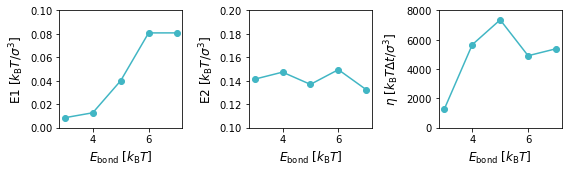

In [22]:
ChemEngsV = [3,4,5,6,7]
StranLab="100 150 200".split()
clrs=['#41b6c4','#225ea8'] #'#a1dab4',
fig,ax=plt.subplots(1,3,figsize = (8,2.5))
for ss in range(1): #len(Strain)
    ax[0].plot(ChemEngsV,E1s[ss,:],color = clrs[ss],marker = 'o',label = 'Strain = '+ StranLab[ss]+'%')
    ax[1].plot(ChemEngsV,E2s[ss,:],color = clrs[ss],marker = 'o',label = 'Strain = '+StranLab[ss]+'%')
    ax[2].plot(ChemEngsV,etas[ss,:],color = clrs[ss],marker = 'o',label = 'Strain = '+StranLab[ss]+'%')
ax[0].set_ylabel(r'E1 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[1].set_ylabel(r'E2 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[2].set_ylabel(r'$\eta$ [$k_{\mathrm{B}}T\Delta t/\sigma^{3}$]',fontsize = 12)
ax[0].set_xlabel('$E_{\mathrm{bond}}$ [$k_{\mathrm{B}}T$]',fontsize = 12)
ax[1].set_xlabel('$E_{\mathrm{bond}}$ [$k_{\mathrm{B}}T$]',fontsize = 12)
ax[2].set_xlabel('$E_{\mathrm{bond}}$ [$k_{\mathrm{B}}T$]',fontsize = 12)
#ax[0].set_ylim([-0.0005,0.004])
#ax[1].set_ylim([-0.0005,0.004])
#ax[2].set_ylim([0,200])
#ax[1].set_ylim([0.02,0.7])
#ax[1].set_yscale('log')
#ax[1].set_yticks([0.03,0.1,0.3],['0.03','0.1','0.3'])
#ax[0].set_yscale('log')
#ax[2].set_yscale('log')
ax[0].set_ylim([0,0.1])
ax[1].set_ylim([0.1,0.2])
ax[2].set_ylim([0.,8e3])
#ax[0].set_yticks([0.03,0.1,0.3],['0.03','0.1','0.3'])
#ax[0].legend(frameon=False,loc = [0,0.9])
fig.tight_layout()
plotname='EquilibriumModuli_NiceFittingLog.pdf'
fig.savefig(plotsdir+plotname)

BD2.4
Fitted parameters:
a = 0.29809940401159796
b = 3.680388710369649e-05
c = 0.00828158690161152
BD2.4
Fitted parameters:
a = 0.2739768720775784
b = 8.5753576551473e-06
c = 0.012598053017439983
BD2.4
Fitted parameters:
a = 0.16839996519905237
b = 3.410174045149959e-06
c = 0.04411206224124666
BD2.4
Fitted parameters:
a = 0.2632645588870089
b = 2.8905701387350618e-06
c = 0.03614962642786068
BD2.4
Fitted parameters:
a = 0.08750998969850562
b = 0.00010369763851217397
c = 0.37802558637455563
BD2.8
Fitted parameters:
a = 0.2657663737976156
b = 2.0820434410653815e-05
c = 0.013591677205284761
BD2.8
Fitted parameters:
a = 0.2006226994186929
b = 7.034011825298152e-06
c = 0.028998520413798037
BD2.8
Fitted parameters:
a = 0.10878816558566998
b = 7.874325609465734e-06
c = 0.12727540674745227
BD2.8
Fitted parameters:
a = 0.1625262874392554
b = 6.875977674237363e-06
c = 0.12866208506798432
BD2.8
Fitted parameters:
a = 0.09767043226909342
b = 9.236418212932671e-05
c = 0.20828468898697292
BD3.2
Fitte

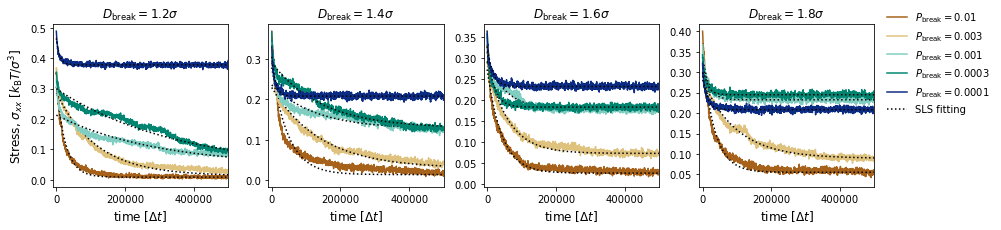

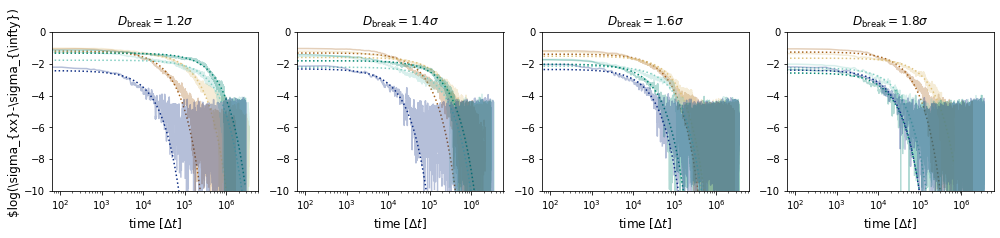

In [31]:
fs = 14
fig,ax = plt.subplots(1,4,figsize = (14,3.3))
fig3,ax3 = plt.subplots(1,4,figsize = (14,3.3))
frame = 440
BDs = "2.4 2.8 3.2 3.6".split() #  3.2 3.6 4.0
BPs = "0.01 0.003 0.001 0.0003 0.0001".split() # 0.001 0.0003 0.0001
StrainV=108
clrs = ['#a6611a','#dfc27d','#80cdc1','#018571','#0c2c84']

tausstress= []
#str_inf0=1
Infs_ova_inf0_strss =[]
Deltas_ova_inf0_strss = []
E1s_NEQ = np.zeros((len(BDs),len(BPs)))
etas_NEQ = np.zeros((len(BDs),len(BPs)))
E2s_NEQ = np.zeros((len(BDs),len(BPs)))
taus_NEQ= np.zeros((len(BDs),len(BPs)))

for ss in range(len(BDs)):
    for e in range(len(BPs)): #len(ChemEngs)
        file = 'stressprofiles/BPs_'+str(BPs[e])+'_BDs_'+str(BDs[ss])+'.dat'
       # file = 'stressprofiles/stress_E'+str(ChemEngs[e])+'.dat'
        stress = pandas.read_csv(datadir+file, sep = ' ', header = 'infer')
        Time_ = stress.Time
        Time = Time_.values
        StressXFull_ = stress.Avstress
        StressXFull = StressXFull_.values

        ## Factual parameters:
        
        Eps_max = StrainV/72 #108
        tstretch = 1e4
        r_eps = Eps_max/tstretch
        N=6
        t_postStretch = 4750 #4700
        #push = 0
        
        TimeNew = Time[t_postStretch+int(N/2):-int(N/2)+1]-Time[t_postStretch+int(N/2)]
        TimePreStretch = Time[int(N/2):-int(N/2)+1+t_postStretch] #-Time[t_postStretch+push+int(N/2)]
        StressXAv = np.convolve(np.abs(np.ravel(StressXFull[t_postStretch:])), np.ones(N)/N, mode='valid')
        StressXAvPreStretch = np.convolve(np.abs(np.ravel(StressXFull[:t_postStretch])), np.ones(N)/N, mode='valid')
        
        sigma_inf = np.mean(StressXFull[-300:-200])
        sigma_max = StressXAv[0]
        str0 = sigma_max-sigma_inf
        strTau = str0/np.exp(1) + sigma_inf
        tau = intersection(StressXAv ,strTau)[0]
        DeltaStrain = sigma_max-sigma_inf
        #print(TimeNew[tau])
        
        # Initial guess for the parameters [a, b, c]
        initial_guess = [DeltaStrain, 1/TimeNew[tau], sigma_inf]

        # Fit the curve
        params, covariance = curve_fit(model_func, TimeNew, StressXAv, p0=initial_guess, maxfev=5000)

        # Extracting the parameters a, b, c
        a, b, c = params

        # Print the fitted parameters
        print("BD"+str(BDs[ss]))
        print(f"Fitted parameters:\na = {a}\nb = {b}\nc = {c}")
        
        sigma_inf = c
        newTau = 1/b
        DeltaStrain=a
        
        eta = DeltaStrain/(r_eps*(1-np.exp(-tstretch/newTau)))
        E2 = eta/newTau
        yL_exact = []
        yS_exact = []
        E1 = sigma_inf/Eps_max
        
        if eta > 10**6 or E2<0:
            E1s_NEQ[ss][e] = None
            E2s_NEQ[ss][e]=None
            etas_NEQ[ss][e]=None
            taus_NEQ[ss][e]=None
        else:
            E1s_NEQ[ss][e]=E1
            E2s_NEQ[ss][e]=E2
            etas_NEQ[ss][e]=eta
            taus_NEQ[ss][e]=newTau
        for tt in range(len(TimeNew)):
            t=TimeNew[tt]
            yL_exact.append(r_eps*eta*(1-np.exp(-tstretch*E2/eta))*np.exp(-t*E2/eta)+E1*tstretch*r_eps)
        ax[ss].set_xlim([-1e4,5e5])
        ax[ss].plot(TimeNew,StressXAv,alpha = 1,color = clrs[e],label = r'$P_{\mathrm{break}} = $'+BPs[e])
        
        ax3[ss].plot(TimeNew,np.log(np.add(StressXAv,-sigma_inf)),alpha = 0.3,color = clrs[e],label = r'$P_{\mathrm{break}} = $'+BPs[e])
        if e==4:
            ax[ss].plot(TimeNew,yL_exact,linestyle = ':',color = 'black',label = 'SLS fitting')
            ax3[ss].plot(TimeNew,np.log(np.add(yL_exact,-sigma_inf)),linestyle = ':',color =  clrs[e],label = 'SLS fitting')
        else:
            ax[ss].plot(TimeNew,yL_exact,linestyle = ':',color = 'black')
            ax3[ss].plot(TimeNew,np.log(np.add(yL_exact,-sigma_inf)),linestyle = ':',color =  clrs[e])
        ax[ss].set_xlabel(r"time [$\Delta t$]",fontsize =12)   
        ax[ss].set_title(r'$D_{\mathrm{break}} = $'+BDsLab[ss]+r'$\sigma$')
        ax3[ss].set_xlabel(r"time [$\Delta t$]",fontsize =12)   
        ax3[ss].set_title(r'$D_{\mathrm{break}} = $'+BDsLab[ss]+r'$\sigma$')
        ax3[ss].set_xscale('log')
        ax3[ss].set_ylim([-10,0])
ax[ss].legend(frameon=False,loc = [1.05,0.42],fontsize=10)
#fig.tight_layout()
#fig.savefig(plotsdir+'Multiple_Ebind_Relax.pdf')
ax[0].set_ylabel(r"Stress, $\sigma_{xx} ~[k_{\mathrm{B}}T/\sigma^{3}$]",fontsize =12)
ax3[0].set_ylabel(r"$log(\sigma_{xx}-\sigma_{\infty})",fontsize =12)
fig.tight_layout()
fig3.tight_layout()
plotname = 'NEQ_fitting.pdf'
fig.savefig(plotsdir+plotname)

plotname3 = 'NEQ_fitting_semilog.pdf'
fig3.savefig(plotsdir+plotname3)




[2.4, 2.8, 3.2, 3.6] [ 2.94  4.86  7.26 10.14]


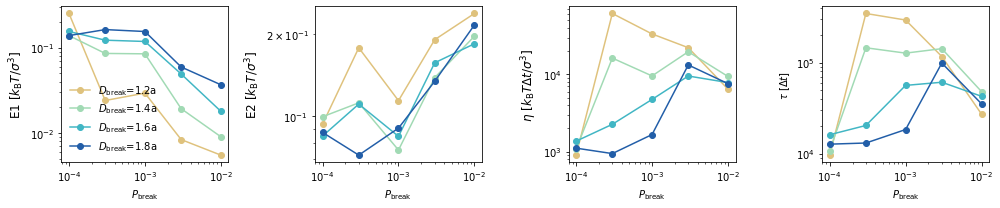

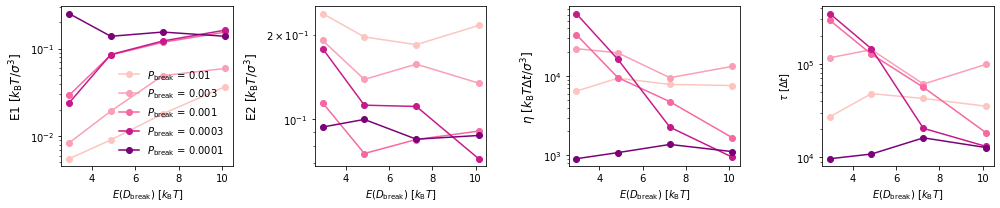

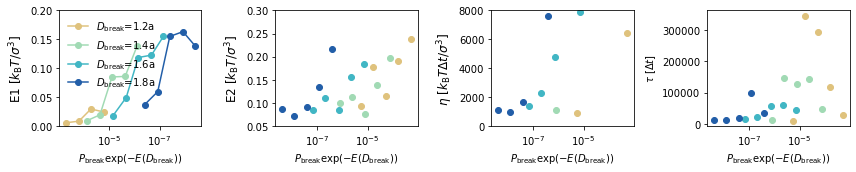

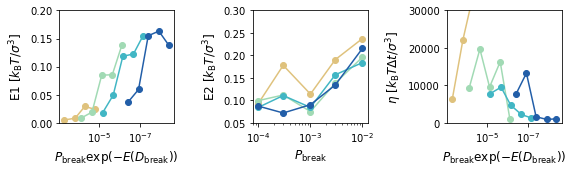

In [51]:
BPsV = [0.01, 0.003, 0.001, 0.0003, 0.0001]


clrs=['#dfc27d','#a1dab4','#41b6c4','#225ea8']
BDsLab="1.2 1.4 1.6 1.8".split()
fig,ax=plt.subplots(1,4,figsize = (14,3))
for ss in range(len(BDs)):
    ax[0].plot(BPsV,E1s_NEQ[ss,:],marker='o',color = clrs[ss],label = r'$D_{\mathrm{break}}$='+BDsLab[ss]+'a')
    ax[1].plot(BPsV,E2s_NEQ[ss,:],marker='o',color = clrs[ss],label = BDs[ss])
    ax[2].plot(BPsV,etas_NEQ[ss,:],marker='o',color = clrs[ss],label = r'$D_{\mathrm{break}}$='+BDsLab[ss]+'a')
    ax[3].plot(BPsV,taus_NEQ[ss,:],marker='o',color = clrs[ss],label = BDs[ss])
ax[0].set_ylabel(r'E1 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[1].set_ylabel(r'E2 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[2].set_ylabel(r'$\eta$ [$k_{\mathrm{B}}T\Delta t/\sigma^{3}$]',fontsize = 12)
ax[3].set_ylabel(r'$\tau$ [$\Delta t$]')
ax[0].set_xlabel('$P_{\mathrm{break}}$')
ax[1].set_xlabel('$P_{\mathrm{break}}$')
ax[2].set_xlabel('$P_{\mathrm{break}}$')
ax[3].set_xlabel('$P_{\mathrm{break}}$')
#ax[0].set_ylim([-0.0005,0.004])
#ax[1].set_ylim([-0.0005,0.004])
#ax[2].set_ylim([0,200])
#ax[1].set_ylim([0.04,0.4])
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[3].set_yscale('log')
ax[0].set_yscale('log')
#ax[0].set_yticks([0.01,0.03,0.1,0.3],['0.01','0.03','0.1','0.3'])
#ax[1].set_yticks([0.03,0.1,0.3],['0.03','0.1','0.3'])
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(frameon=False)
fig.tight_layout()
plotname='NEQ_moduli_BP_xaxis_NiceFitting_log.pdf'
fig.savefig(plotsdir+plotname)

BDsV = [2.4, 2.8, 3.2, 3.6]
clrs = ['#fcc5c0','#fa9fb5','#f768a1','#c51b8a','#7a0177']
fig,ax=plt.subplots(1,4,figsize = (14,3))
for e in range(len(BPs)):
    oneminus = np.add(1,np.multiply(-1,BDsV))
    EnD = np.multiply(np.multiply(oneminus,oneminus),6*0.5*0.5) # -6*(0.5*(1-float(BDsV[ss])))*(0.5*(1-float(BDsV[ss]))))
    ax[0].plot(EnD,E1s_NEQ[:,e],marker='o',color = clrs[e],label = '$P_{\mathrm{break}}$ = '+BPs[e])
    ax[1].plot(EnD,E2s_NEQ[:,e],marker='o',color = clrs[e],label = '$P_{\mathrm{break}}$ = '+BPs[e])
    ax[2].plot(EnD,etas_NEQ[:,e],marker='o',color = clrs[e],label = '$P_{\mathrm{break}}$ = '+BPs[e])
    ax[3].plot(EnD,taus_NEQ[:,e],marker='o',color = clrs[e],label = '$P_{\mathrm{break}}$ = '+BPs[e])
print(BDsV,EnD)
ax[0].set_ylabel(r'E1 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[1].set_ylabel(r'E2 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[2].set_ylabel(r'$\eta$ [$k_{\mathrm{B}}T\Delta t/\sigma^{3}$]',fontsize = 12)
ax[3].set_ylabel(r'$\tau$ [$\Delta t$]')
ax[0].set_xlabel('$E(D_{\mathrm{break}})$ [$k_{\mathrm{B}}T$]')
ax[1].set_xlabel('$E(D_{\mathrm{break}})$ [$k_{\mathrm{B}}T$]')
ax[2].set_xlabel('$E(D_{\mathrm{break}})$ [$k_{\mathrm{B}}T$]')
ax[3].set_xlabel('$E(D_{\mathrm{break}})$ [$k_{\mathrm{B}}T$]')
#ax[1].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[2].set_yscale('log')
ax[3].set_yscale('log')
#ax[0].set_yticks([0.01,0.03,0.1,0.3],['0.01','0.03','0.1','0.3'])
#ax[1].set_yticks([0.03,0.1,0.3],['0.03','0.1','0.3'])
#ax[0].set_ylim([-0.0005,0.004])
#ax[1].set_ylim([-0.0005,0.004])
#ax[2].set_ylim([0,200])
ax[0].legend(frameon=False)
fig.tight_layout()

plotname='NEQ_moduli_BD_xaxis_NiceFitting_log.pdf'
fig.savefig(plotsdir+plotname)
clrs=['#dfc27d','#a1dab4','#41b6c4','#225ea8']
fig,ax=plt.subplots(1,4,figsize = (12,2.5))

for ss in range(len(BDs)):
    EnBars = []
    E1sThis = []
    for e in range(len(BPs)):
        EnBar = BPsV[e]*np.exp(-6*(0.5*(1-float(BDsV[ss])))*(0.5*(1-float(BDsV[ss]))))
        if E1s_NEQ[ss,e]<0.2:
            EnBars.append(EnBar)
            E1sThis.append(E1s_NEQ[ss,e])
        ax[1].plot(EnBar,E2s_NEQ[ss,e],color = clrs[ss],label = r'$D_{\mathrm{break}}$='+BDsLab[ss]+'a',marker = 'o')
        ax[2].plot(EnBar,etas_NEQ[ss,e],color = clrs[ss],label = BPs[e],marker = 'o')
        ax[3].plot(EnBar,taus_NEQ[ss,e],color = clrs[ss],label = BPs[e],marker = 'o')
    ax[0].plot(EnBars,E1sThis,color = clrs[ss],label = r'$D_{\mathrm{break}}$='+BDsLab[ss]+'a',marker = 'o')
    
ax[0].set_ylabel(r'E1 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[1].set_ylabel(r'E2 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[2].set_ylabel(r'$\eta$ [$k_{\mathrm{B}}T\Delta t/\sigma^{3}$]',fontsize = 12)
ax[3].set_ylabel(r'$\tau$ [$\Delta t$]')
ax[0].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$')
ax[1].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$')
ax[2].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$')
ax[3].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$')
#ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
#ax[1].set_yscale('log')
#ax[0].set_yscale('log')
#ax[3].set_yscale('log')
#ax[2].set_yscale('log')
#ax[0].set_yticks([0.01,0.03,0.1,0.3],['0.01','0.03','0.1','0.3'])
#ax[1].set_yticks([0.03,0.1,0.3],['0.03','0.1','0.3'])
#ax[2].set_ylim([0,400])
#ax[2].set_xlim([0,0.0002])
#ax[0].set_ylim([-0.0005,0.004])
#ax[1].set_ylim([-0.0005,0.004])
#ax[2].set_ylim([0,200])
ax[0].legend(frameon=False)
ax[0].invert_xaxis()
ax[0].set_ylim([0,0.2])
ax[1].set_ylim([0.05,0.3])
ax[2].set_ylim([0.,8e3])
fig.tight_layout()
plotname='NEQ_moduli_PexpE_xaxis_NiceFitting_log.pdf'
fig.savefig(plotsdir+plotname)


fig,ax=plt.subplots(1,3,figsize = (8,2.5))

for ss in range(len(BDs)):
    EnBars = []
    E1sThis = []
    EtaThis = []
    for e in range(len(BPs)):
        EnBar = BPsV[e]*np.exp(-6*(0.5*(1-float(BDsV[ss])))*(0.5*(1-float(BDsV[ss]))))
        if E1s_NEQ[ss,e]<0.2:
            EnBars.append(EnBar)
            E1sThis.append(E1s_NEQ[ss,e])
            EtaThis.append(etas_NEQ[ss,e])
        #ax[1].plot(EnBar,E2s_NEQ[ss,e],color = clrs[ss],label = r'$D_{\mathrm{break}}$='+BDsLab[ss]+'a',marker = 'o')
        #ax[2].plot(EnBar,etas_NEQ[ss,e],color = clrs[ss],label = BPs[e],marker = 'o')
        #ax[3].plot(EnBar,taus_NEQ[ss,e],color = clrs[ss],label = BPs[e],marker = 'o')
    ax[0].plot(EnBars,E1sThis,color = clrs[ss],label = r'$D_{\mathrm{break}}$='+BDsLab[ss]+'a',marker = 'o')
    ax[2].plot(EnBars,EtaThis,color = clrs[ss],label = r'$D_{\mathrm{break}}$='+BDsLab[ss]+'a',marker = 'o')
for ss in range(len(BDs)):
    #ax[0].plot(BPsV,E1s_NEQ[ss,:],marker='o',color = clrs[ss],label = r'$D_{\mathrm{break}}$='+BDsLab[ss]+'a')
    ax[1].plot(BPsV,E2s_NEQ[ss,:],marker='o',color = clrs[ss],label = BDs[ss])    
ax[0].set_ylabel(r'E1 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[1].set_ylabel(r'E2 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[2].set_ylabel(r'$\eta$ [$k_{\mathrm{B}}T\Delta t/\sigma^{3}$]',fontsize = 12)
#ax[3].set_ylabel(r'$\tau$ [$\Delta t$]')
ax[0].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$',fontsize = 12)
ax[1].set_xlabel('$P_{\mathrm{break}}$',fontsize = 12)
ax[2].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$',fontsize = 12)
#ax[3].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$')
#ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
#ax[3].set_xscale('log')
#ax[2].legend(frameon=False,loc = [1,0.3])
ax[0].invert_xaxis()
ax[2].invert_xaxis()
ax[0].set_ylim([0,0.2])
ax[1].set_ylim([0.05,0.3])
ax[2].set_ylim([0.,30e3])
fig.tight_layout()
plotname='NEQ_MasterModuli.pdf'
fig.savefig(plotsdir+plotname)

[2.4, 2.8, 3.2, 3.6] [ 2.94  4.86  7.26 10.14]


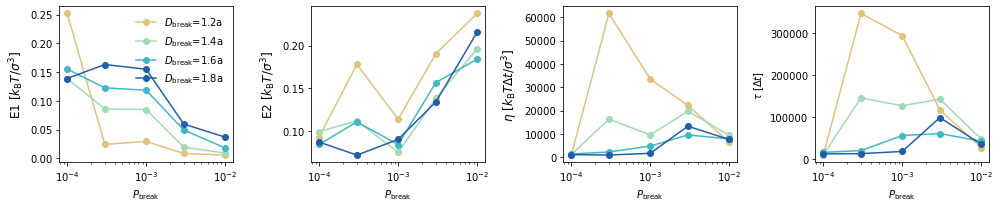

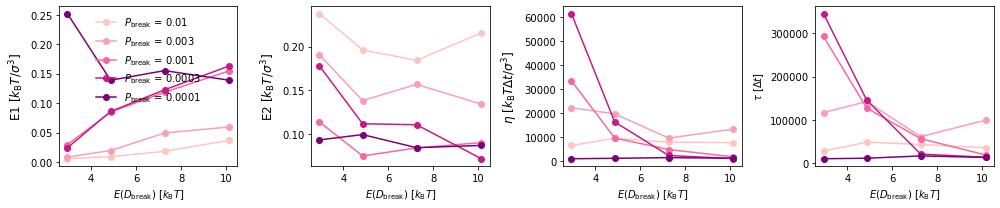

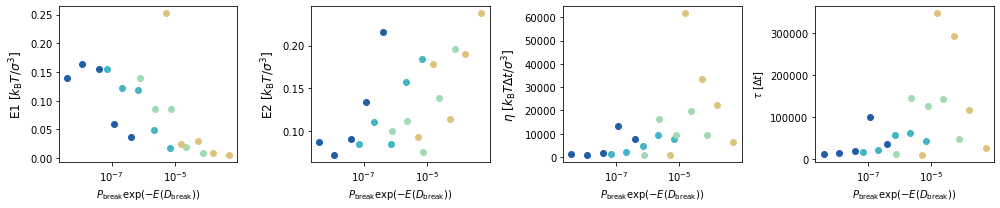

In [94]:
BPsV = [0.01, 0.003, 0.001, 0.0003, 0.0001]


clrs=['#dfc27d','#a1dab4','#41b6c4','#225ea8']
BDsLab="1.2 1.4 1.6 1.8".split()
fig,ax=plt.subplots(1,4,figsize = (14,3))
for ss in range(len(BDs)):
    ax[0].plot(BPsV,E1s_NEQ[ss,:],marker='o',color = clrs[ss],label = r'$D_{\mathrm{break}}$='+BDsLab[ss]+'a')
    ax[1].plot(BPsV,E2s_NEQ[ss,:],marker='o',color = clrs[ss],label = BDs[ss])
    ax[2].plot(BPsV,etas_NEQ[ss,:],marker='o',color = clrs[ss],label = r'$D_{\mathrm{break}}$='+BDsLab[ss]+'a')
    ax[3].plot(BPsV,taus_NEQ[ss,:],marker='o',color = clrs[ss],label = BDs[ss])
ax[0].set_ylabel(r'E1 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[1].set_ylabel(r'E2 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[2].set_ylabel(r'$\eta$ [$k_{\mathrm{B}}T\Delta t/\sigma^{3}$]',fontsize = 12)
ax[3].set_ylabel(r'$\tau$ [$\Delta t$]')
ax[0].set_xlabel('$P_{\mathrm{break}}$')
ax[1].set_xlabel('$P_{\mathrm{break}}$')
ax[2].set_xlabel('$P_{\mathrm{break}}$')
ax[3].set_xlabel('$P_{\mathrm{break}}$')
#ax[0].set_ylim([-0.0005,0.004])
#ax[1].set_ylim([-0.0005,0.004])
#ax[2].set_ylim([0,200])
#ax[1].set_ylim([0.04,0.4])

#ax[0].set_yticks([0.01,0.03,0.1,0.3],['0.01','0.03','0.1','0.3'])
#ax[1].set_yticks([0.03,0.1,0.3],['0.03','0.1','0.3'])
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(frameon=False)
fig.tight_layout()
plotname='NEQ_moduli_BP_xaxis_NiceFitting.pdf'
fig.savefig(plotsdir+plotname)

BDsV = [2.4, 2.8, 3.2, 3.6]
clrs = ['#fcc5c0','#fa9fb5','#f768a1','#c51b8a','#7a0177']
fig,ax=plt.subplots(1,4,figsize = (14,3))
for e in range(len(BPs)):
    oneminus = np.add(1,np.multiply(-1,BDsV))
    EnD = np.multiply(np.multiply(oneminus,oneminus),6*0.5*0.5) # -6*(0.5*(1-float(BDsV[ss])))*(0.5*(1-float(BDsV[ss]))))
    ax[0].plot(EnD,E1s_NEQ[:,e],marker='o',color = clrs[e],label = '$P_{\mathrm{break}}$ = '+BPs[e])
    ax[1].plot(EnD,E2s_NEQ[:,e],marker='o',color = clrs[e],label = '$P_{\mathrm{break}}$ = '+BPs[e])
    ax[2].plot(EnD,etas_NEQ[:,e],marker='o',color = clrs[e],label = '$P_{\mathrm{break}}$ = '+BPs[e])
    ax[3].plot(EnD,taus_NEQ[:,e],marker='o',color = clrs[e],label = '$P_{\mathrm{break}}$ = '+BPs[e])
print(BDsV,EnD)
ax[0].set_ylabel(r'E1 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[1].set_ylabel(r'E2 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[2].set_ylabel(r'$\eta$ [$k_{\mathrm{B}}T\Delta t/\sigma^{3}$]',fontsize = 12)
ax[3].set_ylabel(r'$\tau$ [$\Delta t$]')
ax[0].set_xlabel('$E(D_{\mathrm{break}})$ [$k_{\mathrm{B}}T$]')
ax[1].set_xlabel('$E(D_{\mathrm{break}})$ [$k_{\mathrm{B}}T$]')
ax[2].set_xlabel('$E(D_{\mathrm{break}})$ [$k_{\mathrm{B}}T$]')
ax[3].set_xlabel('$E(D_{\mathrm{break}})$ [$k_{\mathrm{B}}T$]')
#ax[1].set_yscale('log')

#ax[0].set_yticks([0.01,0.03,0.1,0.3],['0.01','0.03','0.1','0.3'])
#ax[1].set_yticks([0.03,0.1,0.3],['0.03','0.1','0.3'])
#ax[0].set_ylim([-0.0005,0.004])
#ax[1].set_ylim([-0.0005,0.004])
#ax[2].set_ylim([0,200])
ax[0].legend(frameon=False)
fig.tight_layout()

plotname='NEQ_moduli_BD_xaxis_NiceFitting.pdf'
fig.savefig(plotsdir+plotname)
clrs=['#dfc27d','#a1dab4','#41b6c4','#225ea8']
fig,ax=plt.subplots(1,4,figsize = (14,3))
for e in range(len(BPs)):
    for ss in range(len(BDs)):
        EnBar = BPsV[e]*np.exp(-6*(0.5*(1-float(BDsV[ss])))*(0.5*(1-float(BDsV[ss]))))
        ax[0].plot( EnBar,E1s_NEQ[ss,e],color = clrs[ss],label = BPs[e],marker = 'o')
        ax[1].plot( EnBar,E2s_NEQ[ss,e],color = clrs[ss],label = BPs[e],marker = 'o')
        ax[2].plot( EnBar,etas_NEQ[ss,e],color = clrs[ss],label = BPs[e],marker = 'o')
        ax[3].plot( EnBar,taus_NEQ[ss,e],color = clrs[ss],label = BPs[e],marker = 'o')
ax[0].set_ylabel(r'E1 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[1].set_ylabel(r'E2 [$k_{\mathrm{B}}T/\sigma^{3}$]',fontsize = 12)
ax[2].set_ylabel(r'$\eta$ [$k_{\mathrm{B}}T\Delta t/\sigma^{3}$]',fontsize = 12)
ax[3].set_ylabel(r'$\tau$ [$\Delta t$]')
ax[0].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$')
ax[1].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$')
ax[2].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$')
ax[3].set_xlabel('$P_{\mathrm{break}}\exp(-E(D_{\mathrm{break}}))$')
#ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
#ax[0].set_yticks([0.01,0.03,0.1,0.3],['0.01','0.03','0.1','0.3'])
#ax[1].set_yticks([0.03,0.1,0.3],['0.03','0.1','0.3'])
#ax[2].set_ylim([0,400])
#ax[2].set_xlim([0,0.0002])
#ax[0].set_ylim([-0.0005,0.004])
#ax[1].set_ylim([-0.0005,0.004])
#ax[2].set_ylim([0,200])
#ax[0].legend(frameon=False)
fig.tight_layout()
plotname='NEQ_moduli_PexpE_xaxis_NiceFitting.pdf'
fig.savefig(plotsdir+plotname)